In [1]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load Expert, Hier-AIRL, and Option-GAIL Trajectories

In [2]:
expert_torch = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/data/mujoco/Hopper-v2_sample.torch")
expert_states = expert_torch[0][0]

# hier-airl
hier_airl_states = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/sample_traj/hier_airl_2024-12-10_02-49-00/state.torch")
hier_airl_options = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/sample_traj/hier_airl_2024-12-10_02-49-00/option.torch")

option_gail_states = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/sample_traj/option_gail_2024-12-10_02-29-22/state.torch")
option_gail_options = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/sample_traj/option_gail_2024-12-10_02-29-22/option.torch")

In [26]:
hier_airl_states.shape
option_gail_options[0]


tensor([[3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3]])

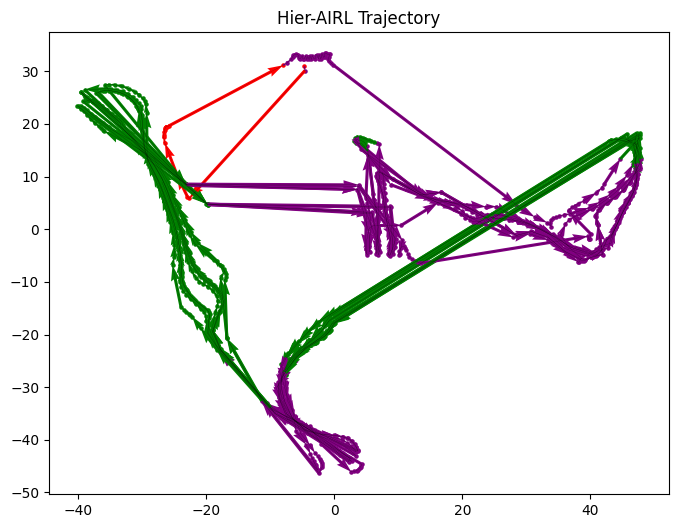

In [27]:
tsne = TSNE(n_components=2, random_state=0)
hier_airl_traj_states = tsne.fit_transform(hier_airl_states[0])

option_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}
# int(option_colors[hier_airl_options[0][0]].item())

plt.figure(figsize=(8, 6))
for idx, (x,y) in enumerate(hier_airl_traj_states):
    option = int(hier_airl_options[0][idx].item())
    plt.scatter(x, y, color=option_colors[option], marker='o', s=5)
    if idx > 0:
        prev_x, prev_y = hier_airl_traj_states[idx - 1]
        plt.plot([prev_x, x], [prev_y, y], color="black", lw=-0.1)
        # plt.annotate('', xy=(x, y), xytext=(prev_x, prev_y),
        #              arrowprops=dict(facecolor="black", edgecolor='none', arrowstyle="->", lw=1, shrinkA=0, shrinkB=0, mutation_scale=100))
        # plt.arrow(pre,y, x-prev_x, y-prev_y)
        plt.quiver(prev_x, prev_y, x-prev_x, y-prev_y, angles='xy', scale_units='xy', scale=1, color=option_colors.get(int(hier_airl_options[0][idx].item()), 'black'), width=0.005)
plt.title('Hier-AIRL Trajectory')
plt.show()

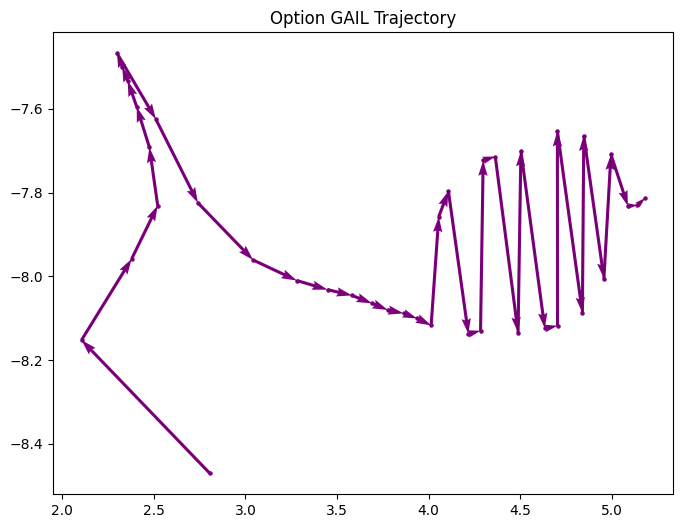

In [23]:
tsne = TSNE(n_components=2, random_state=42)
option_gail_traj_states = tsne.fit_transform(option_gail_states[0])

option_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}
# int(option_colors[hier_airl_options[0][0]].item())

plt.figure(figsize=(8, 6))
for idx, (x,y) in enumerate(option_gail_traj_states):
    option = int(option_gail_options[0][idx].item())
    plt.scatter(x, y, color=option_colors[option], marker='o', s=5)
    if idx > 0:
        prev_x, prev_y = option_gail_traj_states[idx - 1]
        plt.plot([prev_x, x], [prev_y, y], color="black", lw=-0.1)
        # plt.annotate('', xy=(x, y), xytext=(prev_x, prev_y),
        #              arrowprops=dict(facecolor="black", edgecolor='none', arrowstyle="->", lw=1, shrinkA=0, shrinkB=0, mutation_scale=100))
        # plt.arrow(pre,y, x-prev_x, y-prev_y)
        plt.quiver(prev_x, prev_y, x-prev_x, y-prev_y, angles='xy', scale_units='xy', scale=1, color=option_colors.get(int(option_gail_options[0][idx].item()), 'black'), width=0.005)
plt.title('Option GAIL Trajectory')
plt.show()

In [37]:
hier_airl_options[0]

tensor([[0.],
        [3.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
      

In [36]:
agent = torch.load("/home/uoft/mithun/HierAIRL/HierAIRL_Hopper/agent_sxar_data.torch")

In [38]:
agent.shape
agent_traj_0 = agent[0]

/home/uoft/mithun/HierAIRL/.venv/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


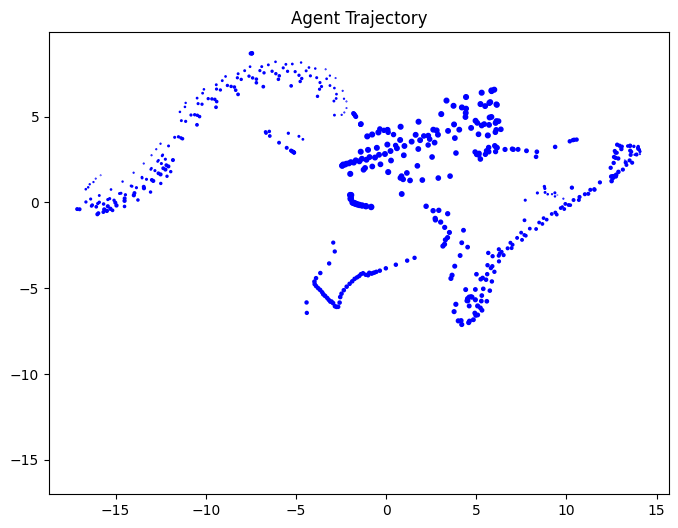

In [49]:
tsne = TSNE(n_components=3, random_state=42)
transformed_traj = tsne.fit_transform(agent_traj_0)

plt.figure(figsize=(8, 6))
plt.scatter(transformed_traj[:, 0], transformed_traj[:, 1], transformed_traj[:,2], c='blue', marker='o')
plt.title('Agent Trajectory')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
"""
R-sum: 3509.697998046875; L-step: 1000
R-sum: 1830.354248046875; L-step: 508
R-sum: 3461.312744140625; L-step: 1000
R-sum: 1834.218505859375; L-step: 508
R-sum: 2536.4208984375; L-step: 705
R-sum: 3487.21337890625; L-step: 1000
R-sum: 1838.361572265625; L-step: 512
R-sum: 3481.633544921875; L-step: 1000
R-sum: 1874.7333984375; L-step: 525
R-sum: 3426.971435546875; L-step: 1000
"""

Text(0.5, 1.0, 'Agent trajectory')

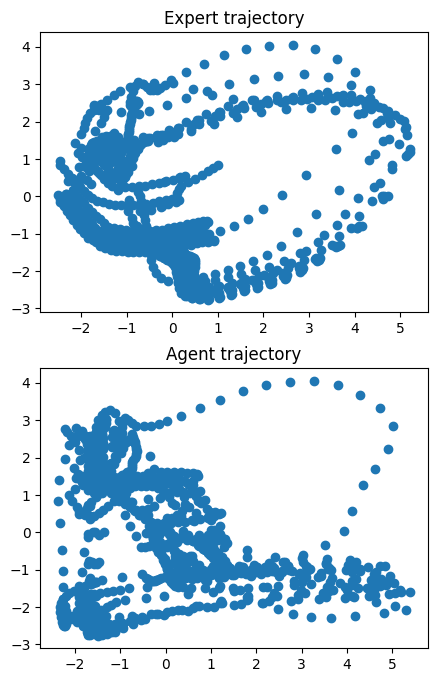

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()
expert = state_traj_0
agent = agent_traj_0
expert = scaler.fit_transform(state_traj_0)
agent = scaler.fit_transform(agent_traj_0)
expert_pca = pca.fit_transform(expert)
agent_pca = pca.fit_transform(agent)

fix, axes = plt.subplots(2,1, figsize=(5,8))

expert_plot = axes[0].scatter(expert_pca[:,0], expert_pca[:,1])
axes[0].set_title("Expert trajectory")

agent_plot = axes[1].scatter(agent_pca[:,0], expert_pca[:,1])
axes[1].set_title("Agent trajectory")